In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


To hypothesis to prove inbetween the variables:
x:
Family instrumental support expectations (T1)
Family relational support expectations (T1)
Family role overload (T1) 
Family emotional demands (T1) 

y:
Family role adjustment(T1) 


The columns from above depicts the image in the paper, which translates to the following columns on the data:


x
(positive)
faminstexp1
famallexp1


(negative)
froleover1
femotdem1

y:
fadj1

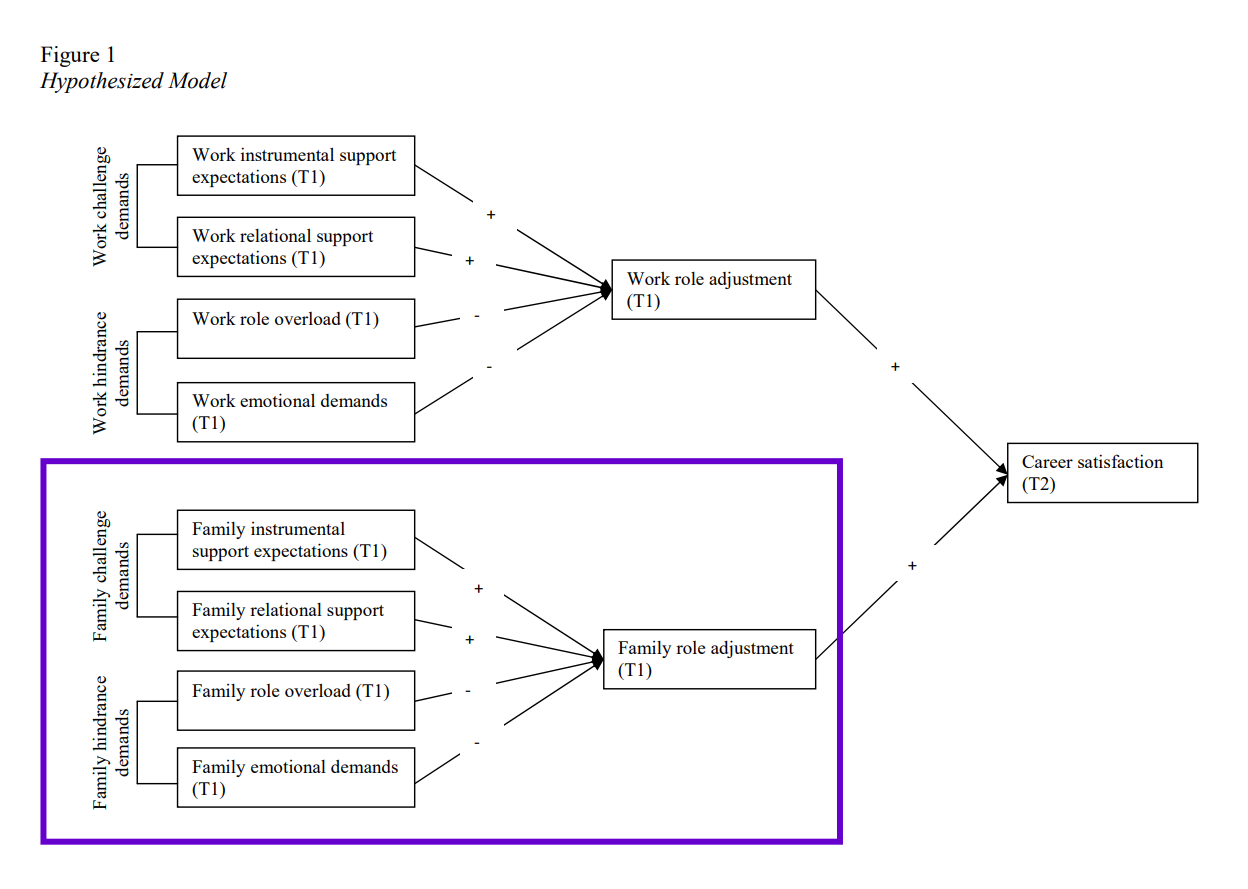

In [91]:
from IPython.display import Image, display

# Display an image
image_path = "../image2.png"
display(Image(filename=image_path))

In [82]:
# Step 1: Load the CSV
file_path = "preprocessed_data.csv"  
data = pd.read_csv(file_path)

# Step 2: Filter Columns
# Specify the columns you want to keep for ML
selected_columns = ['average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem','average_fadj']  
filtered_data = data[selected_columns]

Correlation Matrix

In [83]:
correlation_matrix = filtered_data.corr(method='pearson')  # Use 'spearman' for ranked data
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                     average_faminstexp  average_famallexp  average_froleover  \
average_faminstexp            1.000000           0.411601           0.409016   
average_famallexp             0.411601           1.000000           0.152041   
average_froleover             0.409016           0.152041           1.000000   
average_femotdem              0.637376           0.148969           0.558809   
average_fadj                  0.245824           0.473396           0.004045   

                    average_femotdem  average_fadj  
average_faminstexp          0.637376      0.245824  
average_famallexp           0.148969      0.473396  
average_froleover           0.558809      0.004045  
average_femotdem            1.000000      0.100989  
average_fadj                0.100989      1.000000  


Correlation Matrix filtered to check the relation between each X and y

In [85]:
correlations = filtered_data.corr()["average_fadj"].sort_values(ascending=False)
# Display correlation of each feature with the target
print("Correlation of features with average_fadj   :")
print(correlations)

Correlation of features with average_fadj   :
average_fadj          1.000000
average_famallexp     0.473396
average_faminstexp    0.245824
average_femotdem      0.100989
average_froleover     0.004045
Name: average_fadj, dtype: float64


This correlation summary highlights the relationships between features and average_fadj (family adjustment):

Strong Positive Correlation:

average_famallexp (0.473): Family members' overall experience has the strongest positive association with family adjustment.
Weak Positive Correlation:

average_faminstexp (0.246): Instrumental experience (help or support) from family members shows a weak positive correlation with family adjustment.
average_femotdem (0.101): Emotional demands have a very weak positive relationship with family adjustment.
No Significant Correlation:

average_froleover (0.004): Role overload has an almost negligible correlation with family adjustment.
Summary:
Family adjustment is primarily influenced by family members' overall experience, with weaker contributions from instrumental support and emotional demands. Role overload has little to no impact.

ML modeling

In [60]:
# Features and target
X = filtered_data.drop(columns=['average_fadj'])
y = filtered_data['average_fadj']


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.55


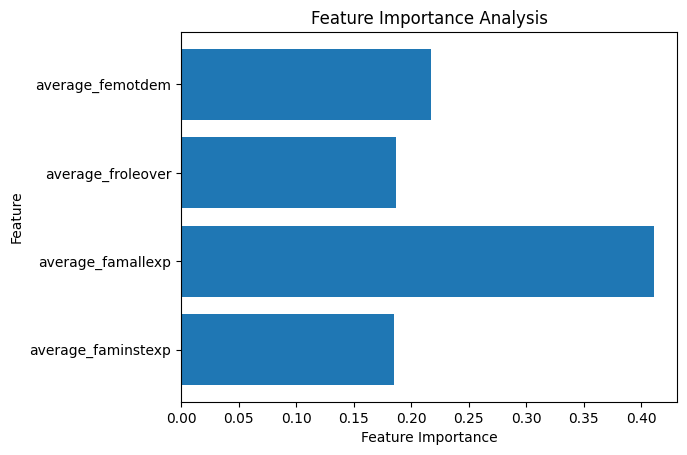

In [87]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()


In [63]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200,500,700],
    'max_depth': [None, 5, 10,15,20],
    'min_samples_split': [2, 5,7],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and MSE
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Tuned Mean Squared Error: {mse_tuned:.2f}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Tuned Mean Squared Error: 0.49


Updating the hyperpameters to the best possible set of values:

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Tuned Mean Squared Error: 0.49

Reason being the current value of Mean Squared Error: 0.55

and after the grid search the possible mse value has dropped to Tuned Mean Squared Error: 0.49


In [64]:


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42, max_depth=5, min_samples_leaf=2, min_samples_split=2,n_estimators=500)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.49


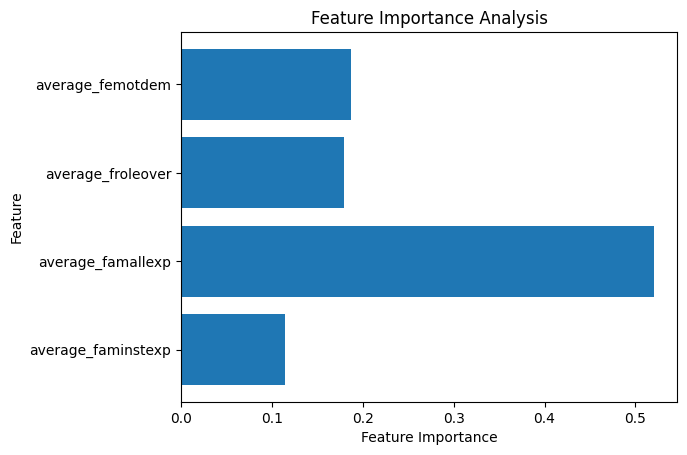

In [65]:


# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()

Cross-Validation
Use cross-validation to ensure the model performs consistently across different subsets of the data.

In [88]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-Validated Mean Squared Error: {cv_mse:.2f}")


Cross-Validated Mean Squared Error: 0.58


Analysis of Model Performance:
Training Mean Squared Error (MSE: 0.33):

The model performs well on the training data with a relatively low error, suggesting it captures patterns within the training set effectively.
Cross-Validated MSE (0.58):

The error on unseen data during cross-validation is notably higher than the training error.
This gap indicates overfitting, meaning the model is learning patterns specific to the training data but struggles to generalize well to unseen data.
Actual Model MSE (0.49):

On the final evaluation data, the error (0.49) lies between the training (0.33) and cross-validated (0.58) errors.
This suggests some improvement over cross-validation performance, but the model still does not generalize perfectly.

 Check for Overfitting
Compare training and testing errors. If the training error is much lower, your model might be overfitting

In [67]:
# Training error
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train:.2f}")


Training Mean Squared Error: 0.33


In [68]:
import pandas as pd
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)


              Feature  Importance
1   average_famallexp    0.519965
3    average_femotdem    0.186409
2   average_froleover    0.178814
0  average_faminstexp    0.114811


In [70]:
correlations = X.join(y).corr()['average_fadj']
print(correlations.sort_values(ascending=False))


average_fadj          1.000000
average_famallexp     0.473396
average_faminstexp    0.245824
average_femotdem      0.100989
average_froleover     0.004045
Name: average_fadj, dtype: float64


This correlation summary explains how features relate to average_fadj (family adjustment):

Strong Positive Correlation:

average_famallexp (0.473): Family members' overall experience has the strongest positive association with family adjustment, indicating it plays a key role in improving family adjustment.
Moderate Positive Correlation:

average_faminstexp (0.246): Instrumental experience (help or support) from family members has a moderate positive correlation with family adjustment.
Weak Positive Correlation:

average_femotdem (0.101): Emotional demands show a weak positive relationship, meaning their influence on family adjustment is minimal.
No Correlation:

average_froleover (0.004): Role overload has no significant relationship with family adjustment.

In [ ]:
!pip install shap


 SHAP Values (SHapley Additive exPlanations)
SHAP values explain the output of a machine learning model by assigning each feature an importance value for each prediction. It provides a global view of feature impact as well as local explanations for individual predictions.

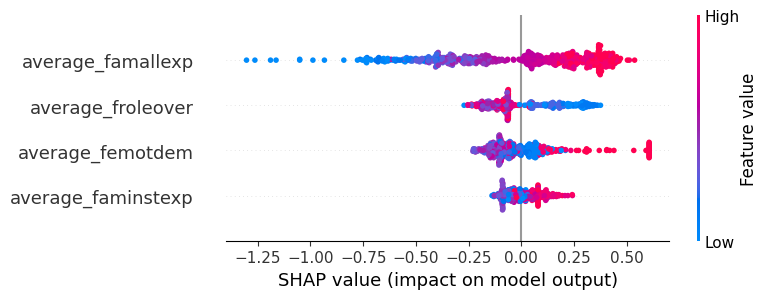

In [72]:
import shap

# Explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize global feature importance
shap.summary_plot(shap_values, X)


SHAP Summary Analysis:
This SHAP plot shows the impact of features on the model output for family adjustment.

average_famallexp (Family Experience):

Has the largest positive impact on family adjustment.
Higher values (pink) push the model output higher (positive SHAP values).
Low values (blue) contribute negatively to the model output.
average_froleover (Role Overload):

Primarily has a negative impact on family adjustment.
Higher role overload (pink) tends to lower the predicted output.
average_femotdem (Emotional Demands):

Shows a mix of positive and negative impacts, but its influence is generally small compared to other features.
High emotional demands (pink) contribute slightly positively, while lower values (blue) may reduce output.
average_faminstexp (Instrumental Experience):

Shows a moderate impact, mostly positive.
Higher instrumental experience (pink) contributes positively to the output, while lower values (blue) have a negative effect.


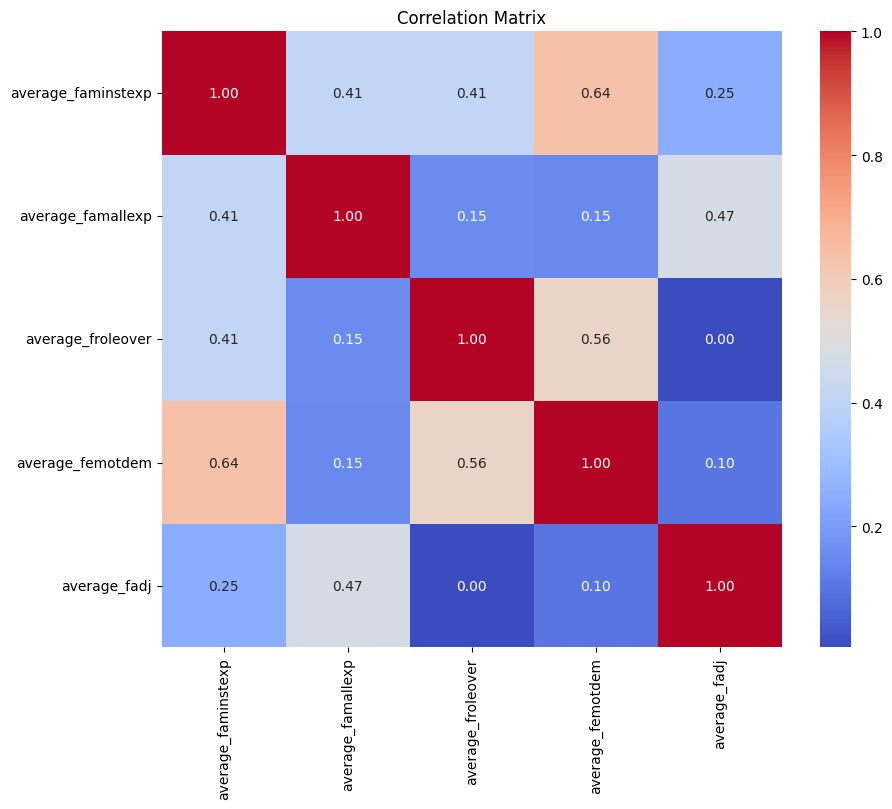

In [74]:
import seaborn as sns

# Compute correlation matrix
corr = X.join(y).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


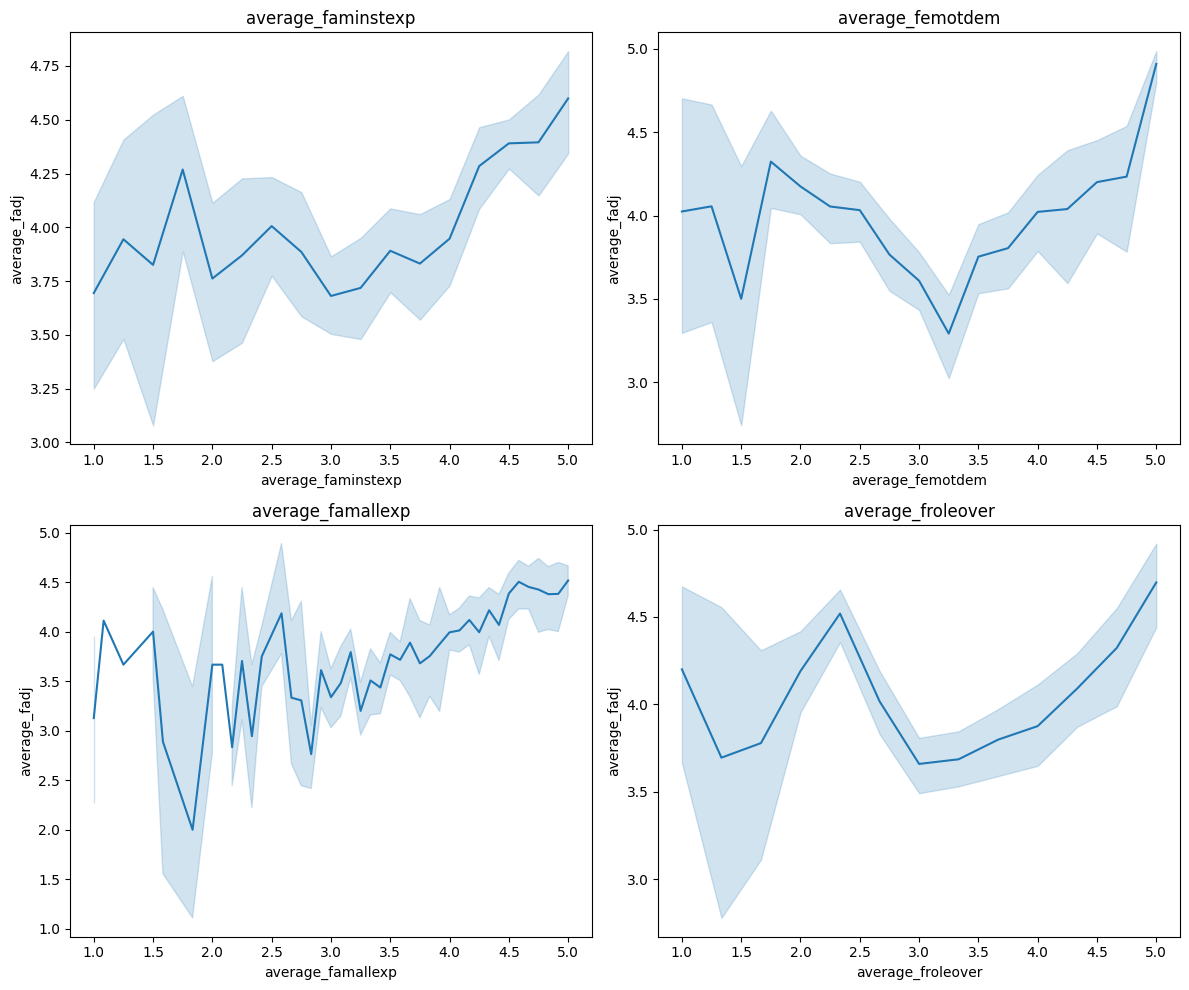

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# List of features to plot
features = ['average_faminstexp', 'average_femotdem', 'average_famallexp', 'average_froleover']

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    sns.lineplot(x=X[feature], y=y, ax=axs[i])
    axs[i].set_title(f"{feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("average_fadj")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()



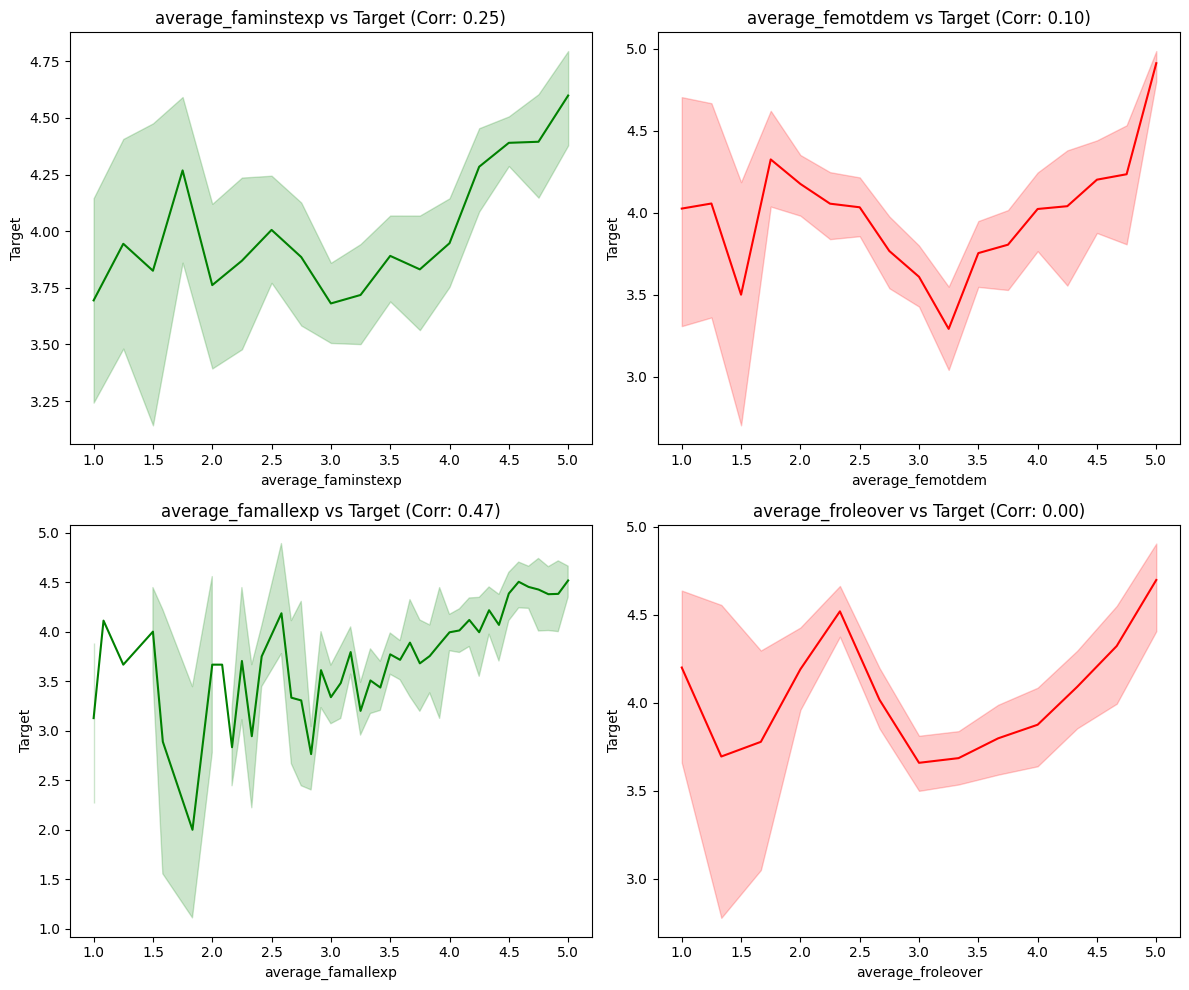

In [81]:

# Calculate the correlation between each feature and the target
correlations = X.corrwith(y)

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# List of features to plot
features = ['average_faminstexp', 'average_femotdem', 'average_famallexp', 'average_froleover']

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    # Get the correlation for the current feature
    corr = correlations[feature]
    
    # Set the color based on the correlation
    if corr > 0.2:
        color = 'green'  # Positive correlation
    elif corr < 0.2:
        color = 'red'    # Negative correlation
    else:
        color = 'blue'   # No correlation or neutral
    
    # Create a line plot
    sns.lineplot(x=X[feature], y=y, ax=axs[i], color=color)
    axs[i].set_title(f"{feature} vs Target (Corr: {corr:.2f})")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Target")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()


In [89]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor with parameters
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Use squared error for regression
    random_state=42,
    learning_rate=0.1,             # Step size shrinkage
    n_estimators=50,               # Number of boosting rounds (trees)
    max_depth=5,                   # Maximum depth of a tree
    min_child_weight=2,            # Minimum sum of instance weight for child nodes
    subsample=0.8,                 # Random fraction of data for training each tree
    colsample_bytree=0.8           # Fraction of features used per tree
)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.53


In [90]:
# Import libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the grid of hyperparameters
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'n_estimators': [50, 100, 200],      # Number of boosting rounds (trees)
    'max_depth': [3, 5, 7],              # Maximum depth of a tree
    'min_child_weight': [1, 2, 5],       # Minimum sum of instance weight for child nodes
    'subsample': [0.8, 1.0],             # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0]       # Fraction of features used per tree
}

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for scoring
    cv=5,                              # Cross-validation folds
    verbose=2,                         # Show progress
    n_jobs=-1                          # Use all available CPUs
)

# Fit the model with Grid Search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Test Set): {mse:.2f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 50, 'subsample': 0.8}
Mean Squared Error (Test Set): 0.50


Keeping the second model just for comparision and as the result is slightly better from the first model, XGboost is just used for reference.